In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt


In [2]:
# Make a distribution by multiplying 100 random numbers together
b = []
number = 10000
for i in range(number):
    a = 0.6 + np.random.random(100)
    b.append(np.product(a))

In [3]:
# Print the median, and the mean.
df = pd.DataFrame(b, columns = ['cost'])
print 'Median = ', df.median()['cost']
print'Mean = ', df.mean()['cost']
df.describe()

Median =  357.91066473
Mean =  12964.6822449


,cost
count,10000.000000
mean,12964.682245
std,161436.424564
min,0.003920
25%,54.992165
50%,357.910665
75%,2276.822146
max,13842123.530903


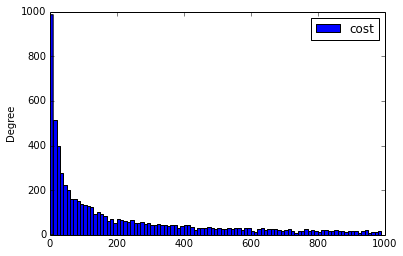

In [4]:
# Plot it to check what it looks like
plt.figure();
df.plot(kind='hist', bins=np.arange(0., 1000, 10))

In [5]:
# For a certain number of iterations, take a random sample of a proportion of the overall number, and calculate the
# average cost per event by taking the mean.
sample_df = pd.DataFrame(columns = ['1', '5%', '10%', '20%', '30%', '40%', '50%', '60%', '70%', '80%', '90%', '95%'])

for i in range(1000):
    new_df = pd.DataFrame({
            '1': df.ix[random.sample(df.index, 1)].mean()['cost'],
            '5%': df.ix[random.sample(df.index, int(0.05 * number))].mean()['cost'],
            '10%': df.ix[random.sample(df.index, int(0.1 * number))].mean()['cost'],
            '20%': df.ix[random.sample(df.index, int(0.2 * number))].mean()['cost'],
            '30%': df.ix[random.sample(df.index, int(0.3 * number))].mean()['cost'],
            '40%': df.ix[random.sample(df.index, int(0.4 * number))].mean()['cost'],
            '50%': df.ix[random.sample(df.index, int(0.5 * number))].mean()['cost'],
            '60%': df.ix[random.sample(df.index, int(0.6 * number))].mean()['cost'],
            '70%': df.ix[random.sample(df.index, int(0.7 * number))].mean()['cost'],
            '80%': df.ix[random.sample(df.index, int(0.8 * number))].mean()['cost'],
            '90%': df.ix[random.sample(df.index, int(0.9 * number))].mean()['cost'],
            '95%': df.ix[random.sample(df.index, int(0.95 * number))].mean()['cost']
        }, index = [0])
    sample_df = sample_df.append(new_df, ignore_index=True)

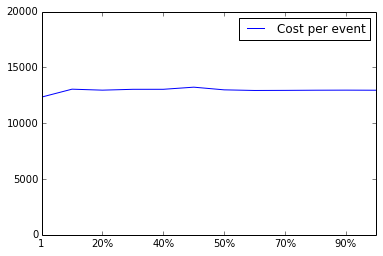

In [6]:
# Plot the average of each of iterations for each % of the overall number sampled. Smaller samples have higher noise
# due to them being an average of fewer points, this is not a trend.
pd.DataFrame(sample_df.mean(), columns = ['Cost per event']).plot(ylim = [0,20000])